In [1]:
%matplotlib inline


# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [2]:
allData = pd.read_csv(r'how-much-did-it-rain-ii\train\train.csv')
allData.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254


In [3]:
allData.tail()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
13765196,1180945,38,9.0,33.0,19.5,25.5,36.5,33.0,20.5,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765197,1180945,42,9.0,33.0,21.0,30.5,37.0,36.5,22.0,33.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765198,1180945,47,9.0,29.5,10.0,26.0,30.5,31.0,16.5,26.0,...,1.051667,1.75,NaN,0.750,3.0000,13.379990,NaN,NaN,13.379990,8.636004
13765199,1180945,52,9.0,19.0,NaN,15.5,26.5,19.0,NaN,16.5,...,1.051667,NaN,NaN,NaN,2.8125,NaN,NaN,NaN,NaN,8.636004
13765200,1180945,57,9.0,7.5,NaN,10.0,13.0,14.5,10.0,12.5,...,1.051667,0.00,-1.125,0.375,3.2500,6.069992,NaN,-8.029999,6.069992,8.636004


In [4]:
allData.columns

Index(['Id', 'minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th',
       'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th', 'Expected'],
      dtype='object')

In [5]:
allData = allData.groupby('Id').mean().dropna()

In [6]:
import scipy.stats as stats
(12.4-13.357143)/stats.norm.ppf(0.9)

-0.7468626512841554

In [7]:
trainData = allData.reset_index().drop(columns=['Id','minutes_past'])
# trainData = trainData.loc[:,['radardist_km','Ref','RefComposite','RhoHV','Zdr','Kdp','Expected']]

In [117]:
trainData.head()

,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,2.0,16.625000,13.666667,17.375000,21.333333,22.666667,20.375000,22.916667,25.916667,0.998611,...,1.000000,0.380208,0.119792,0.416667,0.781250,-0.288187,-1.448893,-0.319096,1.116661,1.016001
1,8.0,19.600000,18.083333,19.200000,24.863636,24.590909,22.250000,23.727273,28.590909,0.931667,...,1.014524,1.156250,-0.593750,0.531250,1.026786,0.002499,-3.963338,-0.217506,3.734997,3.225002
2,10.0,33.958333,30.291667,33.625000,37.125000,34.791667,32.125000,34.791667,38.000000,0.902778,...,0.987500,0.255208,-1.031250,0.526042,2.838542,-1.404172,-5.938337,0.176662,6.999995,0.010000
3,12.0,19.285714,17.357143,19.928571,23.071429,19.285714,17.357143,19.928571,23.071429,0.985476,...,1.011667,0.482143,-0.428571,0.196429,0.964286,-1.450004,-2.458572,-0.150003,2.465709,2.540001
4,6.0,32.850000,32.000000,34.200000,36.950000,40.800000,37.750000,40.150000,43.100000,0.992333,...,0.998000,1.162500,0.687500,1.043750,1.531250,0.067993,-1.230002,-0.036003,1.763994,3.302002


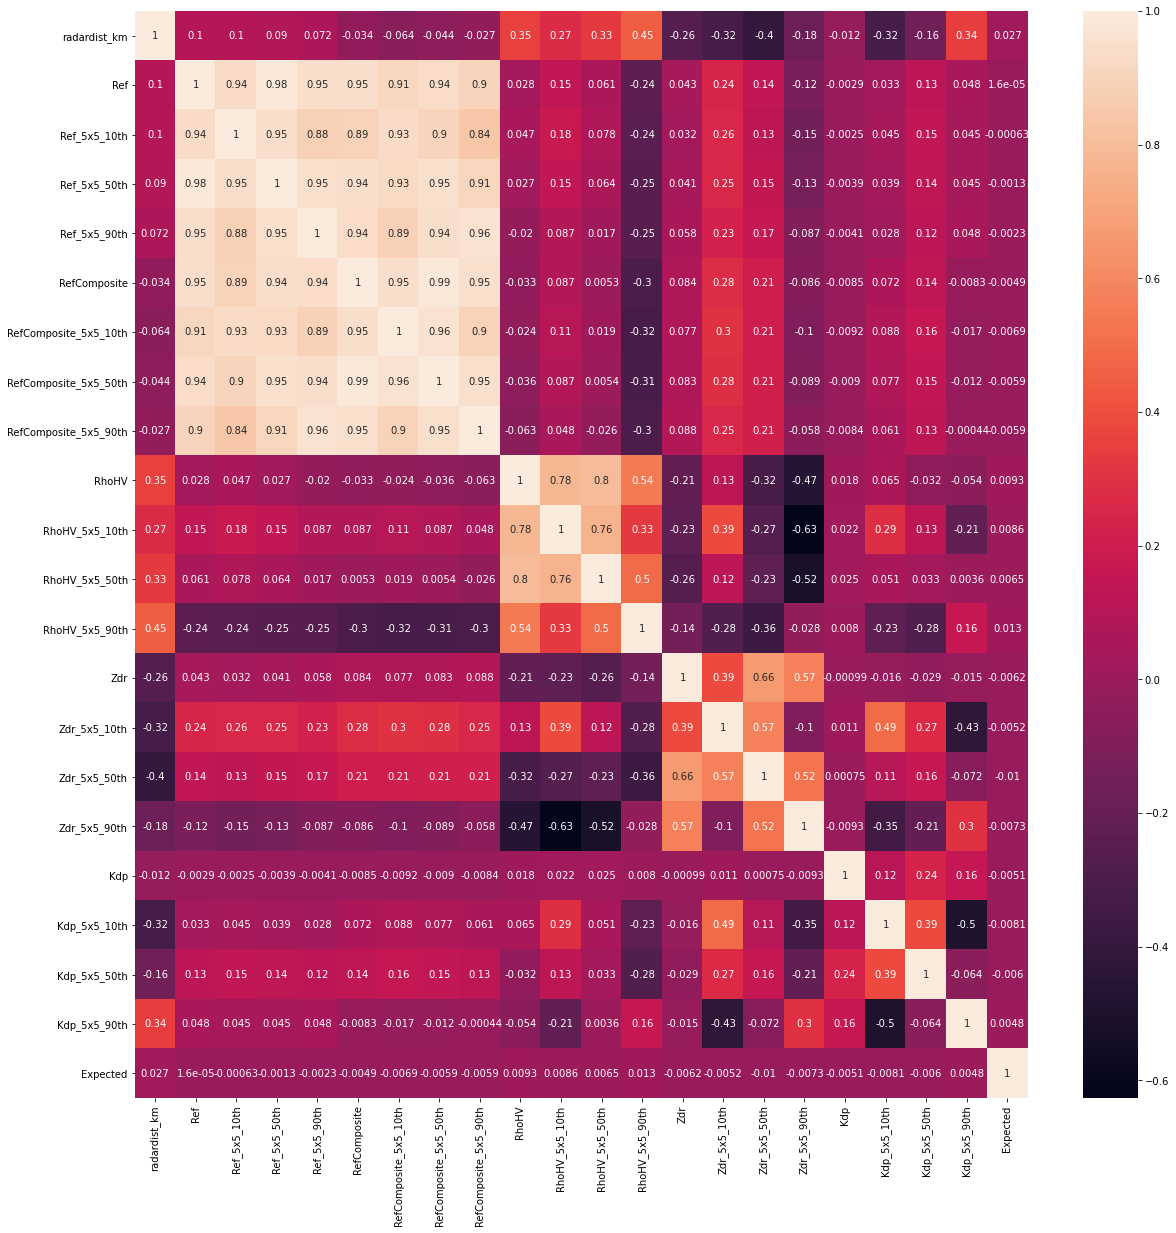

In [8]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(trainData.loc[:,:].corr(), annot=True)
plt.show()

In [9]:
import scipy.stats as stats
q1 = trainData.Expected.quantile(0.25)
q3 = trainData.Expected.quantile(0.75)
q2 = trainData.Expected.quantile(0.5)
lsl = q1 - 1.5*(q3-q1)
usl = q3 + 1.5*(q3-q1)
trainData = trainData.loc[((trainData.Expected<=usl)&(trainData.Expected>=lsl)),:]

In [107]:
random_state = 1 
features = list(set(trainData.columns) - {'Expected'}) 
predicted = 'Expected'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
featuresData = trainData.loc[:,features].values
predictor = trainData.loc[:,predicted].values

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
featuresData_scld = featuresData #scaler.fit_transform(featuresData) ## scaling does not help.

In [109]:
featuresData_scld = PolynomialFeatures(degree=2).fit_transform(featuresData_scld)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(featuresData_scld,predictor,test_size=0.2,random_state=random_state)

In [111]:
lm = Lasso()
lm.fit(X_train,y_train)
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

C:\Users\ksdee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280.54407878010534, tolerance: 114.7370436969704
  model = cd_fast.enet_coordinate_descent(


0.183928758317758
0.18750193823503314


In [116]:
(25.5 - 33.0)/stats.norm.ppf(0.5)

0.0